In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import collections  as mc
import numpy as np
import random
import sys

In [2]:
# create all points based upon rotations

rotate_x_1 = np.array([[ 1, 0, 0],
                       [ 0, 0,-1],
                       [ 0, 1, 0]])
rotate_x_2 = np.array([[ 1, 0, 0],
                       [ 0, 0, 1],
                       [ 0,-1, 0]])

rotate_y_1 = np.array([[ 0, 0, 1],
                       [ 0, 1, 0],
                       [-1, 0, 0]])
rotate_y_2 = np.array([[ 0, 0,-1],
                       [ 0, 1, 0],
                       [ 1, 0, 0]])

rotate_z_1 = np.array([[ 0,-1, 0],
                       [ 1, 0, 0],
                       [ 0, 0, 1]])
rotate_z_2 = np.array([[ 0, 1, 0],
                       [-1, 0, 0],
                       [ 0, 0, 1]])

rotations = [rotate_x_1, rotate_x_2, rotate_y_1,
             rotate_y_2, rotate_z_1, rotate_z_2]

<IPython.core.display.Javascript object>


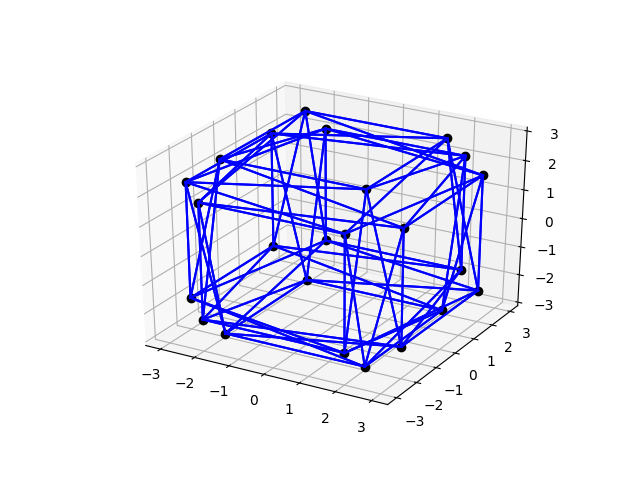

In [3]:
# plot the data
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# let's do some math.
start_point = (3, 2, 2)
new_states = [start_point] # everything that needs another look at
states = [start_point] # everything
links = [] # tuples of indexes into states

while new_states:
    # get a new base state. this is what we're going to be clearing off our list.
    base_state = new_states.pop()
    
    # plot it. [we only want to do this once.]
    x, y, z = base_state
    ax.plot([x], [y], [z], 'ko ')
    
    # now, rotate it in each direction:
    for rotate in rotations:
        new_state = np.matmul(rotate, base_state)
        new_state = tuple(list(new_state)) # convert to tuple.
        
        # plot the line
        x2, y2, z2 = new_state
        ax.plot([x, x2], [y, y2], [z, z2], 'b-')
        
        # add the new state
        if new_state not in states:
            new_states.append(new_state)
            states.append(new_state)
        
        # add the link, if it's new, to the list.
        link = (states.index(base_state), states.index(new_state))
        if link not in links:
            links.append(link)
        
        


In [4]:
markov = np.eye(23)
for r, c in links:
    if r is not 0 and c is not 0:
        markov[r-1, c-1] += -1/6.0
        
extras = np.ones(23)
costs = np.linalg.solve(markov, extras)
costs.sum()/24

24.749999999999996

In [10]:
# now let's try it empirically!

trials = []

for i in range(10000000):
    if i % 10000 == 0 and i != 0:
        print "{mean:4.7f}, {i:>8}".format(mean=np.mean(trials), i=i)

    # begin with one random point from states
    current_state = random.choice(states)
    moves = 0
    # until it's equal to the start state
    while current_state != start_point:
        # well, we gotta make a move... add one.
        moves += 1
        # randomly select a move
        rotate = random.choice(rotations)
        # apply move
        current_state = np.matmul(rotate, current_state)
        # return to tuple format.
        current_state = tuple(list(current_state))

    trials.append(moves)

print np.mean(trials)

24.5395000,    10000
24.3491000,    20000
24.4368667,    30000
24.5236000,    40000
24.5821600,    50000
24.6029333,    60000
24.6507857,    70000
24.6336875,    80000
24.6749222,    90000
24.6797900,   100000
24.7109182,   110000
24.6911667,   120000
24.7072615,   130000
24.7089643,   140000
24.6979533,   150000
24.6905813,   160000
24.6967882,   170000
24.6913333,   180000
24.6986316,   190000
24.6948250,   200000
24.6913952,   210000
24.6685409,   220000
24.6485739,   230000
24.6601542,   240000
24.6649920,   250000
24.6712385,   260000
24.6704444,   270000
24.6596286,   280000
24.6624724,   290000
24.6643300,   300000
24.6723871,   310000
24.6740781,   320000
24.6696727,   330000
24.6855382,   340000
24.6842343,   350000
24.6845250,   360000
24.6926919,   370000
24.6968237,   380000
24.6888487,   390000
24.6969875,   400000
24.6929683,   410000
24.6926905,   420000
24.6946837,   430000
24.6904114,   440000
24.7003022,   450000
24.6976130,   460000
24.6975660,   470000
24.6980813,  

24.7469582,  3920000
24.7473776,  3930000
24.7473239,  3940000
24.7473603,  3950000
24.7470503,  3960000
24.7475358,  3970000
24.7471550,  3980000
24.7469115,  3990000
24.7469308,  4000000
24.7466125,  4010000
24.7463580,  4020000
24.7468491,  4030000
24.7458678,  4040000
24.7461227,  4050000
24.7469672,  4060000
24.7475983,  4070000
24.7477407,  4080000
24.7470628,  4090000
24.7471315,  4100000
24.7478628,  4110000
24.7469816,  4120000
24.7469349,  4130000
24.7468633,  4140000
24.7470947,  4150000
24.7464490,  4160000
24.7463667,  4170000
24.7459928,  4180000
24.7455468,  4190000
24.7457079,  4200000
24.7456005,  4210000
24.7460166,  4220000
24.7457317,  4230000
24.7468828,  4240000
24.7472101,  4250000
24.7476944,  4260000
24.7486520,  4270000
24.7481661,  4280000
24.7481117,  4290000
24.7477188,  4300000
24.7476118,  4310000
24.7479407,  4320000
24.7478388,  4330000
24.7477364,  4340000
24.7490202,  4350000
24.7483213,  4360000
24.7477805,  4370000
24.7472123,  4380000
24.7464392,  

24.7599636,  7830000
24.7596191,  7840000
24.7599392,  7850000
24.7602772,  7860000
24.7605393,  7870000
24.7603839,  7880000
24.7606686,  7890000
24.7603563,  7900000
24.7601690,  7910000
24.7598888,  7920000
24.7597381,  7930000
24.7595170,  7940000
24.7597591,  7950000
24.7602345,  7960000
24.7603937,  7970000
24.7599906,  7980000
24.7596190,  7990000
24.7594295,  8000000
24.7592201,  8010000
24.7590784,  8020000
24.7594533,  8030000
24.7595274,  8040000
24.7598379,  8050000
24.7599017,  8060000
24.7600725,  8070000
24.7600392,  8080000
24.7604768,  8090000
24.7601120,  8100000
24.7604502,  8110000
24.7606936,  8120000
24.7608793,  8130000
24.7608643,  8140000
24.7606665,  8150000
24.7602239,  8160000
24.7602497,  8170000
24.7599133,  8180000
24.7595541,  8190000
24.7589026,  8200000
24.7589443,  8210000
24.7589443,  8220000
24.7597563,  8230000
24.7594439,  8240000
24.7593012,  8250000
24.7591682,  8260000
24.7595387,  8270000
24.7601071,  8280000
24.7598405,  8290000
24.7600051,  